# 01 - Fundamentos de Python para meteorología


Puedes correr comandos de terminal directamente en una celda de notebook usando !:

In [ ]:
!ls       # En Linux/Mac: lista archivos
# !dir    # En Windows: descomenta esta línea si usas Windows

### Acceder a la documentación
Usa el signo de interrogación (?) al final de una función o módulo para ver su descripción.

In [14]:
import numpy as np

# Ejecuta esta celda para ver la documentación
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, device=None, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.

In [ ]:
# Celda de instalación (Colab)
try:
    import google.colab
    !pip install -r https://raw.githubusercontent.com/jpantojac/wrf-course/main/requirements_colab.txt

except Exception:
    pass

Este cuaderno busca que el alumnado domine tipos básicos, control de flujo, funciones y el “stack” científico mínimo para análisis meteorológico, que luego se utilizará con salidas de modelos numéricos como WRF.​
Se usarán NumPy para cómputo vectorizado, Pandas para datos tabulares y Xarray para arreglos N‑dimensionales con coordenadas y metadatos, que son centrales en geociencias.

In [4]:
# Colab: instalación rápida (si hace falta)
!pip -q install numpy pandas xarray netCDF4 matplotlib

import sys, numpy, pandas, xarray, matplotlib
print(sys.version)
print("NumPy:", numpy.__version__, "Pandas:", pandas.__version__, "Xarray:", xarray.__version__)


3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:23:22) [MSC v.1944 64 bit (AMD64)]
NumPy: 1.26.4 Pandas: 2.3.3 Xarray: 2025.6.1


### Python esencial
Python proporciona un tutorial oficial que introduce sintaxis, tipos, control de flujo y funciones, por lo que aquí se resume lo mínimo con ejercicios prácticos.
Se recomienda ejecutar, modificar y volver a ejecutar cada celda para favorecer el aprendizaje activo y la comprensión de errores comunes

Python es un lenguaje de programación de alto nivel, interpretado y de código abierto. Se caracteriza por su sintaxis clara, su gran comunidad y su amplia adopción en áreas como análisis de datos, inteligencia artificial, climatología y muchas más.

Un lenguaje de alto nivel como Python está diseñado para que las personas lo entiendan y escriban fácilmente. A diferencia de otros lenguajes como C o Fortran, con Python podemos hacer más con menos líneas de código.

In [16]:
# Tu primer programa en Python
print("Hola, mundo")

Hola, mundo


#### Números enteros (int) y decimales (float)
Los enteros (int) representan números sin parte decimal, mientras que los decimales (float) permiten representar números reales.

In [ ]:
# Entero
a = 10
print("a:", a, "| tipo:", type(a))

In [ ]:
# Decimal
pi = 3.1416
print("pi:", pi, "| tipo:", type(pi))

#### Cadenas de texto (str)
Las cadenas (str) son secuencias de caracteres encerradas entre comillas simples o dobles. Se usan para representar palabras, frases u otros textos.

In [ ]:
mensaje = "Hola, mundo"
nombre = 'Python'

print(mensaje)
print("Nombre:", nombre)
print("Tipo:", type(nombre))

#### Booleanos (bool)
Los booleanos son valores lógicos que solo pueden ser True (verdadero) o False (falso). Se utilizan para hacer comparaciones y estructuras de control.

In [ ]:
es_mayor = 5 > 3
es_igual = (10 == 20)

print("5 > 3:", es_mayor)
print("10 == 20:", es_igual)
print("Tipo de es_mayor:", type(es_mayor))

#### Listas (list)
Las listas son colecciones ordenadas y modificables. Se definen con corchetes y pueden contener distintos tipos de datos.

In [ ]:
mi_lista = [1, "texto", 3.14, True]

print("Lista:", mi_lista)
print("Primer elemento:", mi_lista[0])
print("Tipo:", type(mi_lista))

# Modificar un valor
mi_lista[1] = "nuevo texto"
print("Lista modificada:", mi_lista)

#### Diccionarios (dict)
Un diccionario es una colección no ordenada de pares clave: valor. Se define con llaves {} y permite acceder a cada valor por su clave.

In [ ]:
info_persona = {
    "nombre": "Pedro Perez",
    "edad": 35,
    "ciudad": "Bogotá"
}

print("Nombre:", info_persona["nombre"])
print("Edad:", info_persona["edad"])
print("Diccionario completo:", info_persona)
print("Tipo:", type(info_persona))

# Agregar una nueva clave
info_persona["profesion"] = "Científico de datos"
print("Actualizado:", info_persona)


#### Tuplas (tuple)
Las tuplas son similares a las listas, pero no se pueden modificar. Se definen con paréntesis () y son útiles para almacenar datos fijos.

In [ ]:
coordenadas = (4.61, -74.07)

print("Tupla:", coordenadas)
print("Latitud:", coordenadas[0])
print("Longitud:", coordenadas[1])
print("Tipo:", type(coordenadas))

# Intentar modificar una tupla (esto generará un error)
try:
    coordenadas[0] = 0
except TypeError as e:
    print("Error:", e)

#### Conjuntos (set)
Los conjuntos son colecciones no ordenadas que no permiten elementos duplicados. Se definen con set() o llaves {}.

In [ ]:
valores = [1, 2, 2, 3, 4, 4, 5]
conjunto = set(valores)

print("Original:", valores)
print("Set sin duplicados:", conjunto)
print("Tipo:", type(conjunto))

# Agregar un nuevo elemento
conjunto.add(6)
print("Actualizado:", conjunto)

#### Operadores Básicos
Los operadores nos permiten realizar cálculos y comparaciones con datos. Python proporciona operadores aritméticos para matemáticas, operadores de comparación para evaluar condiciones, y más.

Operadores aritméticos
Python permite usar operadores matemáticos básicos:

In [ ]:
# Operadores aritméticos básicos
print("Suma: 1 + 2 =", 1 + 2)
print("Resta: 5 - 3 =", 5 - 3)
print("Multiplicación: 4 * 3 =", 4 * 3)
print("División: 10 / 2 =", 10 / 2)
print("División entera: 10 // 3 =", 10 // 3)
print("Potenciación: 2 ** 4 =", 2 ** 4)
print("Módulo (resto): 10 % 3 =", 10 % 3)

#### Estructuras de Control

Condicionales if, elif, else
Las estructuras condicionales permiten ejecutar bloques de código solo si se cumple una condición.

In [ ]:
x = 10

if x > 0:
    print("x es positivo")
elif x == 0:
    print("x es cero")
else:
    print("x es negativo")

In [ ]:
valor = True

if type(valor) == str:
    print("Es una cadena de texto")
elif type(valor) == int:
    print("Es un número entero")
elif type(valor) == float:
    print("Es un número decimal")
elif type(valor) == bool:
    print("Es un valor booleano")

In [5]:
# Variables y tipos
a = 3            # int
b = 2.5          # float
c = "WRF"        # str
d = True         # bool

print(type(a), type(b), type(c), type(d))

# Operadores y f-strings
x = a + b
print(f"Suma a+b = {x:.2f}")


<class 'int'> <class 'float'> <class 'str'> <class 'bool'>
Suma a+b = 5.50


In [6]:
# Estructuras de datos
lista = [1, 2, 3, 5]
tupla = (10, 20)
dicc  = {"modelo": "WRF", "nivel": 850}

lista.append(8)
dicc["region"] = "Andes"
print(lista, tupla, dicc)


[1, 2, 3, 5, 8] (10, 20) {'modelo': 'WRF', 'nivel': 850, 'region': 'Andes'}


In [7]:
# Decisiones
t2 = 298.5
if t2 > 300:
    estado = "muy cálido"
elif t2 > 295:
    estado = "cálido"
else:
    estado = "templado"
print("Clasificación:", estado)


Clasificación: cálido


#### Bucles
El bucle while repite un bloque de código mientras se cumpla una condición.

Bucle While

In [ ]:
contador = 0

while contador < 3:
    print("Contador:", contador)
    contador += 1

Bucle for
El bucle for se usa para recorrer elementos de una secuencia (como una lista o rango).

In [ ]:
for i in range(5):
    print("Valor de i:", i)

In [8]:
# Bucles
acum = 0
for k in range(1, 6):
    acum += k
print("Suma 1..5 =", acum)

# while
n = 0
while n < 3:
    print("Iteración", n)
    n += 1


Suma 1..5 = 15
Iteración 0
Iteración 1
Iteración 2


#### Las funciones 
son bloques de código reutilizables que se definen una vez y se pueden ejecutar múltiples veces. Son ideales para automatizar tareas repetitivas y organizar mejor tu código.

##### ¿Qué es una función?
Una función se define usando la palabra clave def, seguida del nombre de la función, paréntesis con los argumentos, y dos puntos :. El cuerpo de la función va indentado.

In [ ]:
# Esta función imprime un saludo
def saludar():
    print("Hola, te damos la bienvenida al curso")

# Llamamos la función
saludar()

In [9]:
# Funciones y manejo de errores
def c_to_k(t_c):
    """Convierte °C a K."""
    return t_c + 273.15

try:
    print(c_to_k(25.0))
    print(c_to_k("25"))  # generará un error
except TypeError as e:
    print("Tipo inválido:", e)


298.15
Tipo inválido: can only concatenate str (not "float") to str


In [ ]:
def sumar(a, b):
    resultado = a + b
    print("Resultado:", resultado)

sumar(3, 5)
sumar(10, -2)

### Librerias

Una librería (o módulo) es una colección de funciones y clases ya escritas que puedes reutilizar en tu código. Usarlas ahorra tiempo y permite hacer cosas complejas fácilmente.

Por ejemplo, existen librerías para matemáticas (numpy), el manejo de datos (pandas), procesamiento de datos climáticos (xarray), visualización (matplotlib), y muchas más.

¿Cómo se importa una librería?
Usamos la palabra clave import para traer una librería a nuestro entorno de trabajo.

Ahora podemos usar cualquier función dentro de numpy, como:

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr

In [ ]:
numeros = np.array([1, 2, 3])
print(numeros)

A continuación, presentamos algunas de las librerías más utilizadas en análisis científico y de datos climáticos:

**numpy** → Permite realizar cálculos numéricos y operaciones con arrays de manera eficiente.

**pandas** → Ofrece estructuras de datos tipo tabla (DataFrames) ideales para manipular datos tabulados.

**xarray** → Diseñada para trabajar con datos multidimensionales, como series de tiempo o datos climáticos en grillas.

Estas librerías están optimizadas para el trabajo científico y forman la base de muchas herramientas modernas para la ciencia abierta y la climatología computacional.

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr

# Crear un array con numpy
arr = np.arange(5)
print("Array con numpy:", arr)

# Crear una tabla (DataFrame) con pandas
df = pd.DataFrame({
    "nombre": ["Ana", "Luis", "Camila"],
    "edad": [23, 34, 29]
})
print("\nTabla con pandas:")
print(df)

# Crear un dataset con xarray
ds = xr.Dataset({
    "temperatura": (("x",), [15.1, 17.3, 16.8])
})
print("\nDataset con xarray:")
print(ds)

### NumPy en 15 minutos

NumPy (Numerical Python) es una librería fundamental para el análisis numérico y científico en Python.

Esta guía práctica está diseñada para que te familiarices con la sintaxis, funcionalidades básicas y buenas prácticas al trabajar con NumPy. Los conceptos aquí presentados serán esenciales para el uso posterior de librerías como Pandas y Xarray.

NumPy introduce arreglos N‑dimensionales y operaciones vectorizadas que brindan rendimiento y claridad en cálculos numéricos típicos de meteorología.​
El “quickstart” oficial muestra creación de arreglos, formas, broadcasting, selección avanzada y funciones universales, que usaremos para estadísticas y máscaras lógicas

Los arreglos —en inglés arrays— son la estructura de datos fundamental en NumPy. Funcionan de manera similar a las listas en Python, pero están optimizados para realizar operaciones matemáticas de forma eficiente y vectorizada.

Puedes crear un arreglo a partir de una lista de Python utilizando la función np.array():

In [ ]:
import numpy as np

a = np.array([1, 2, 3])

In [ ]:
print(a)
print("Tipo:", type(a))
print("Dimensiones:", a.ndim)
print("Forma:", a.shape)
print("Tipo de datos:", a.dtype)

In [10]:
import numpy as np

# Crear arreglos
a = np.arange(12).reshape(3, 4)
b = np.linspace(0, 1, 4)
print("a shape:", a.shape, "b:", b)

# Operaciones vectorizadas y broadcasting
t = np.array([290., 295., 300., 305.])  # K
t_c = t - 273.15
print("°C:", t_c)

# Indexación y máscaras
print("a:\n", a)
mask = a > 6
print("Máscara:\n", mask)
print("Elementos > 6:", a[mask])

# Estadística rápida
print("Media a:", a.mean(), "Desv:", a.std())


a shape: (3, 4) b: [0.         0.33333333 0.66666667 1.        ]
°C: [16.85 21.85 26.85 31.85]
a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Máscara:
 [[False False False False]
 [False False False  True]
 [ True  True  True  True]]
Elementos > 6: [ 7  8  9 10 11]
Media a: 5.5 Desv: 3.452052529534663


### 🔹 Producto elemento a elemento vs. Producto matricial en NumPy

```python
import numpy as np

A = np.array([[1, 1],
              [0, 1]])

B = np.array([[2, 0],
              [3, 4]])

print("Producto elemento a elemento:\n", A * B)
print("Producto matricial (A @ B):\n", A @ B)


In [11]:
# Producto y álgebra lineal
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3, 4]])
print("Producto elemento a elemento:\n", A * B)
print("Producto matricial (A @ B):\n", A @ B)


Producto elemento a elemento:
 [[2 0]
 [0 4]]
Producto matricial (A @ B):
 [[5 4]
 [3 4]]


### Visualización de gráficos e imágenes
Una de las ventajas de trabajar en JupyterLab es que puedes generar y visualizar gráficos directamente en el cuaderno, justo debajo de la celda de código.



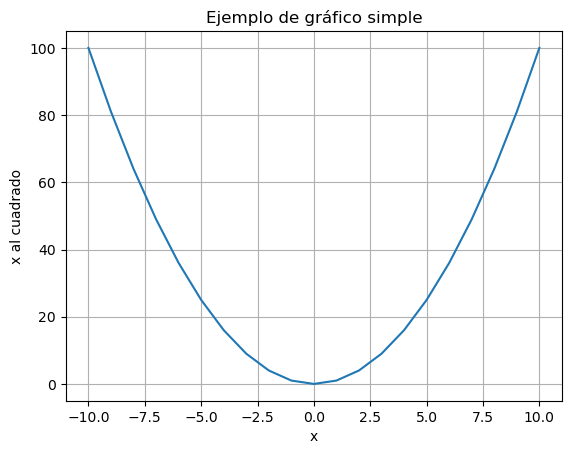

In [15]:
import matplotlib.pyplot as plt

x = np.arange(-10, 11)
y = x**2

plt.plot(x, y)
plt.title("Ejemplo de gráfico simple")
plt.xlabel("x")
plt.ylabel("x al cuadrado")
plt.grid(True)
plt.show()

### Pandas para tabulares
Pandas facilita el manejo de series y tablas, lectura/escritura y agregaciones, lo que es útil para estaciones o resúmenes horario‑diarios.​
La guía “Getting started” explica selección con loc/iloc, groupby, resample y gráficos básicos integrados, que se practicarán en el siguiente ejemplo sintético.

In [25]:
import pandas as pd
# Datos sintéticos tipo estación
df = pd.DataFrame({
    "time": pd.date_range("2024-03-01", periods=12, freq="h"),
    "T2": np.random.normal(298, 2, 12),     # K Crea 12 valores simulados de temperatura (en Kelvin), usando una distribución normal (gaussiana) con Media = 298, Desviación estándar = 2
    "WS": np.random.rayleigh(3, 12)         # m/s Crea 12 valores simulados de velocidad del viento (en m/s), según una distribución de Rayleigh con parámetro de escala 3
}).set_index("time")
#df
# Conversión de unidades y resumen diario
df["T2_C"] = df["T2"] - 273.15
daily = df.resample("D").agg({"T2_C":"mean","WS":"max"})
display(df.head(), daily)


,T2,WS,T2_C
time,,,
2024-03-01 00:00:00,297.883915,6.665388,24.733915
2024-03-01 01:00:00,299.286019,1.252554,26.136019
2024-03-01 02:00:00,297.651864,4.380534,24.501864
2024-03-01 03:00:00,299.875639,5.614773,26.725639
2024-03-01 04:00:00,296.594361,2.063915,23.444361


,T2_C,WS
time,,
2024-03-01,25.59111,6.665388


In [28]:
# Selección y filtros
seleccion = df.loc["2024-03-01 06:00":"2024-03-01 10:00"]
calido = df[df["T2_C"] > 25]
display(calido, seleccion)


,T2,WS,T2_C
time,,,
2024-03-01 01:00:00,299.286019,1.252554,26.136019
2024-03-01 03:00:00,299.875639,5.614773,26.725639
2024-03-01 06:00:00,299.881917,2.120444,26.731917
2024-03-01 08:00:00,300.214974,2.447893,27.064974
2024-03-01 09:00:00,299.392690,2.561936,26.242690
2024-03-01 10:00:00,300.899090,4.300244,27.749090
2024-03-01 11:00:00,300.357815,2.555519,27.207815


,T2,WS,T2_C
time,,,
2024-03-01 06:00:00,299.881917,2.120444,26.731917
2024-03-01 07:00:00,295.333393,4.124946,22.183393
2024-03-01 08:00:00,300.214974,2.447893,27.064974
2024-03-01 09:00:00,299.392690,2.561936,26.242690
2024-03-01 10:00:00,300.899090,4.300244,27.749090


### Xarray para datos N‑D
Xarray añade dimensiones, coordenadas y atributos sobre arreglos estilo NumPy, facilitando operaciones expresivas en datos gridded como NetCDF y GRIB.​
El tutorial de Pythia destaca DataArray y Dataset, subsetting por nombres de dimensiones, agregaciones y trazabilidad de metadatos CF, que son pilares del posproceso atmosférico.

In [8]:
import xarray as xr
# Dataset de ejemplo (descarga automática si no está en caché)
ds = xr.tutorial.open_dataset("air_temperature")
ds


<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

| Atributo                                                                                                                                                   | Qué significa                                                                                                                                                                                                                                                     |
| ---------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Conventions: COARDS**                                                                                                                                    | Indica que el dataset sigue las **convenciones COARDS**, un estándar para archivos NetCDF que define cómo organizar las coordenadas y las dimensiones. Esto asegura que programas de análisis puedan interpretar correctamente los datos.                         |
| **title: 4x daily NMC reanalysis (1948)**                                                                                                                  | El título del dataset. Dice que los datos son **re-análisis del NMC (National Meteorological Center)** con frecuencia **4 veces al día** desde 1948.                                                                                                              |
| **description: Data is from NMC initialized reanalysis (4x/day). These are the 0.9950 sigma level values.**                                                | Una descripción más detallada. Explica que: <br>• Los datos provienen de un **re-análisis inicializado por NMC** <br>• Se toman **4 veces al día** <br>• Los valores corresponden al **nivel sigma 0.9950**, que en meteorología es casi la superficie terrestre. |
| **platform: Model**                                                                                                                                        | Indica que los datos provienen de un **modelo** (no de mediciones directas).                                                                                                                                                                                      |
| **references: [http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html](http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html)** | Un enlace a la fuente oficial del dataset para obtener más información.                                                                                                                                                                                           |


In [9]:
# Selección por coordenadas y agregaciones en Xarray

# Extraemos la variable de temperatura 'air' del dataset,
# obteniendo un DataArray de dimensiones (time, lat, lon)
air = ds["air"]

# Seleccionamos un subconjunto temporal: solo los datos desde el 1 al 7 de enero de 2013 (inclusive)
aire_semana = air.sel(time=slice("2013-01-01", "2013-01-07"))

# Calculamos el promedio sobre la dimensión latitud,
# obteniendo así la variación temporal y longitudinal de la temperatura,
# es decir, cómo varía la temperatura durante esa semana a lo largo del tiempo y de la longitud
prom_lat = aire_semana.mean("lat")

# Calculamos el promedio diario (media sobre cada día) en todas las posiciones lat/lon
# Esto lo logramos reagrupando ("resample") los datos cada 1 día, y luego promediando
prom_dia = aire_semana.resample(time="1D").mean()

# Mostramos los DataArrays resultantes (puede usarse display en Jupyter/Colab o print como alternativa)
display(prom_lat, prom_dia)



<xarray.DataArray 'air' (time: 28, lon: 53)> Size: 12kB
array([[279.398 , 279.6664, 279.6612, ..., 279.9508, 280.3152, 280.6624],
       [279.0572, 279.538 , 279.7296, ..., 279.7756, 280.27  , 280.7976],
       [279.0104, 279.2808, 279.5508, ..., 279.682 , 280.1976, 280.814 ],
       ...,
       [279.0212, 279.0508, 278.9816, ..., 279.6288, 280.4496, 281.1496],
       [278.55  , 278.7272, 278.866 , ..., 278.8188, 279.6652, 280.5032],
       [278.5136, 278.7384, 278.9808, ..., 279.3376, 279.85  , 280.4384]],
      shape=(28, 53))
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 224B 2013-01-01 ... 2013-01-07T18:00:00

<xarray.DataArray 'air' (time: 7, lat: 25, lon: 53)> Size: 74kB
array([[[241.8725, 242.3   , 242.675 , ..., 233.3725, 235.175 ,
         237.675 ],
        [244.575 , 244.5725, 244.275 , ..., 231.2475, 232.825 ,
         236.3   ],
        [254.    , 253.2225, 251.8225, ..., 231.475 , 233.695 ,
         238.625 ],
        ...,
        [296.3   , 295.975 , 296.    , ..., 295.8975, 295.32  ,
         294.945 ],
        [296.325 , 296.725 , 296.7425, ..., 296.1725, 296.    ,
         295.5475],
        [296.62  , 296.995 , 297.1   , ..., 297.0225, 297.0475,
         296.9725]],

       [[243.6   , 243.5   , 243.3   , ..., 238.9725, 240.7975,
         243.0725],
        [247.8225, 247.2   , 246.2225, ..., 235.925 , 236.5975,
         238.6   ],
        [253.5225, 252.0725, 250.2975, ..., 237.6975, 238.8725,
         241.9   ],
...
        [296.2475, 295.    , 294.295 , ..., 294.175 , 293.7   ,
         293.47  ],
        [296.    , 295.55  , 295.02  , ..., 294.4725, 294.4475,
         294.3   ],
        [296.4475, 296.25  , 295.7475, ..., 295.9   , 295.85  ,
         295.9475]],

       [[252.1725, 252.575 , 252.7   , ..., 242.55  , 244.35  ,
         246.3975],
        [251.4   , 251.475 , 251.2725, ..., 238.0475, 239.9225,
         243.1975],
        [250.35  , 248.77  , 247.1175, ..., 240.6475, 243.1675,
         247.225 ],
        ...,
        [296.72  , 295.85  , 294.97  , ..., 295.2725, 294.9   ,
         294.0975],
        [296.795 , 296.45  , 295.6   , ..., 295.195 , 294.9   ,
         294.195 ],
        [297.05  , 296.7   , 296.145 , ..., 295.8725, 295.3225,
         294.925 ]]], shape=(7, 25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 56B 2013-01-01 2013-01-02 ... 2013-01-07
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

(array([  27.,  124.,  349.,  567., 1766., 2177.,  204.,   74.,    9.,
           3.]),
 array([-17.34254167, -14.08037083, -10.8182    ,  -7.55602917,
         -4.29385833,  -1.0316875 ,   2.23048333,   5.49265417,
          8.754825  ,  12.01699583,  15.27916667]),
 <BarContainer object of 10 artists>)

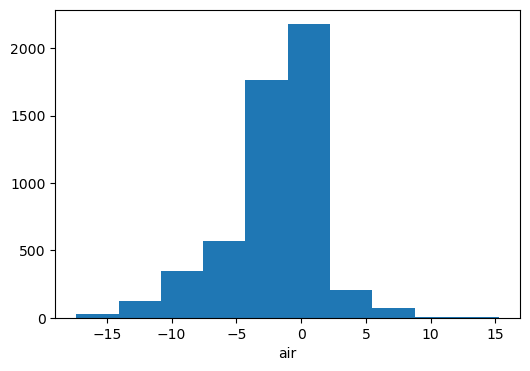

In [11]:
# Calculamos anomalías mensuales de temperatura en cada punto de la grilla.
# Para esto, agrupamos el array por mes en la coordenada 'time',
# y restamos la media mensual de cada punto (para el período disponible)
anom = air.groupby("time.month") - air.groupby("time.month").mean("time")

# Seleccionamos el campo de anomalía para el 1 de junio de 2013,
# es decir, vemos cómo se desvía la temperatura ese día respecto a la media mensual histórica.
anom.sel(time="2013-06-01").plot(figsize=(6,4))




La imagen muestra un mapa de anomalía de temperatura para el 1 de junio de 2013, donde se representa la diferencia entre la temperatura registrada en cada punto de la grilla y el promedio esperado para el mes de junio (calculado sobre todos los años disponibles en el dataset).

Los tonos que se observan representan el valor de la anomalía:

Zonas con colores positivos (más cálidas que el promedio mensual) indican lugares donde ese día la temperatura fue superior al valor medio de junio en ese punto.

Zonas con colores negativos (más frías que el promedio mensual) muestran regiones que estuvieron más frías de lo habitual para ese mes.

El patrón espacial ayuda a identificar regiones con eventos cálidos o fríos respecto a la climatología del modelo para ese día concreto.

Este tipo de gráfico es útil para detectar extremos meteorológicos y analizar la variabilidad día a día respecto a la climatología mensual.

### Lectura y escritura con Xarray
open_dataset permite abrir NetCDF u orígenes OPeNDAP y decodificar metadatos CF; chunks habilita carga perezosa con dask para grandes volúmenes.​
xarray.tutorial.open_dataset ofrece datasets de ejemplo para practicar sin configurar fuentes externas, lo que agiliza ejercicios en Colab.

In [36]:
# Guardar un derivado con compresión
subset = air.sel(time=slice("2013-01-01","2013-01-03"))
subset.to_netcdf("air_3dias.nc", encoding={"air":{"zlib":True, "complevel":4}})
ds2 = xr.open_dataset("air_3dias.nc")
ds2


<xarray.Dataset> Size: 128kB
Dimensions:  (lat: 25, lon: 53, time: 12)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 96B 2013-01-01 ... 2013-01-03T18:00:00
Data variables:
    air      (time, lat, lon) float64 127kB ...

### Mini‑proyecto guiado
Objetivo: calcular temperatura media diaria y anomalías semanales, y visualizar un mapa y una serie, consolidando selección, resample y gráficos.​
Se trabaja sobre el dataset de ejemplo para garantizar reproducibilidad en cualquier entorno antes de pasar a salidas de WRF en capítulos siguientes

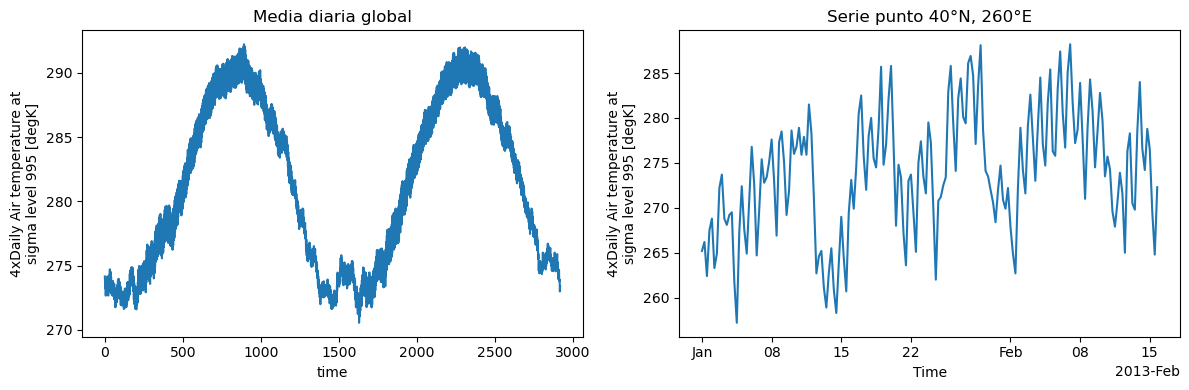

In [4]:
import matplotlib.pyplot as plt  # Importamos pyplot de matplotlib para graficar
import xarray as xr               # Importamos xarray para trabajar con datos multidimensionales

# Abrimos un dataset de ejemplo que contiene temperatura del aire
air = xr.tutorial.open_dataset("air_temperature")["air"]

# Calculamos la media diaria global de temperatura,
# agrupando por día y promediando las dimensiones latitud y longitud
daily_mean = air.resample(time="1D").mean(("lat","lon"))

# Seleccionamos la serie temporal de temperatura para el punto geográfico más cercano a lat=40°N, lon=260°E
pt = air.sel(lat=40, lon=260, method="nearest")

# Creamos una figura con 2 subplots horizontales y tamaño personalizado
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Graficamos la media diaria global en el primer subplot (axes[0])
daily_mean.plot(ax=axes[0])
axes[0].set_title("Media diaria global")

# Graficamos la serie temporal en el punto seleccionado en el segundo subplot (axes[1])
pt.sel(time=slice("2013-01-01", "2013-02-15")).plot(ax=axes[1])
axes[1].set_title("Serie punto 40°N, 260°E")

# Ajusta automáticamente el espaciado para evitar solapamientos de elementos
plt.tight_layout()



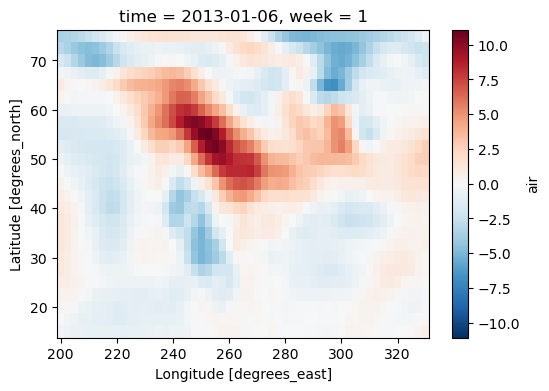

In [5]:
# Reagrupamos la variable 'air' en semanas,
# calculando la media semanal para cada punto de la grilla
weekly = air.resample(time="1W").mean()

# Calculamos la climatología semanal (media histórica para cada semana)
# El agrupamiento se hace usando el número de semana ISO de cada fecha
clim_w = weekly.groupby(weekly.time.dt.isocalendar().week).mean("time")

# Calculamos la anomalía semanal de cada punto y semana,
# restando la climatología semanal a cada valor específico
anom_w = weekly.groupby(weekly.time.dt.isocalendar().week) - clim_w

# Seleccionamos la primera semana disponible y graficamos el mapa de anomalía
anom_w.isel(time=0).plot(figsize=(6,4))



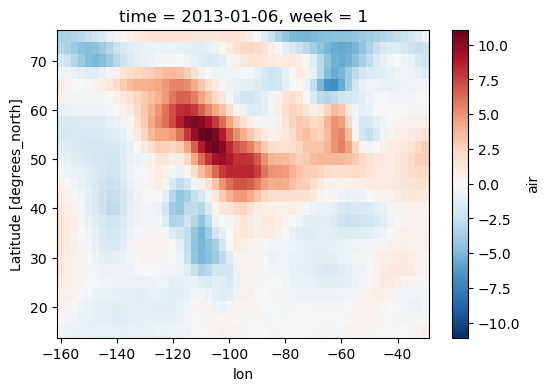

In [6]:
# Reagrupar la variable 'air' en promedio semanal para cada punto espacial
weekly = air.resample(time="1W").mean()

# Calcular la climatología semanal: media de todas las semanas con el mismo número ISO
clim_w = weekly.groupby(weekly.time.dt.isocalendar().week).mean("time")

# Calcular la anomalía semanal restando la climatología a cada semana específica
anom_w = weekly.groupby(weekly.time.dt.isocalendar().week) - clim_w

# Ajustar las coordenadas de longitud que están originalmente de 0 a 360 grados
# para que vayan de -180 a 180 grados, que es el formato estándar para mapas globales
anom_w.coords['lon'] = (anom_w.coords['lon'] + 180) % 360 - 180

# Ordenar el DataArray por longitud para evitar desorden en el mapa,
# ya que desordenar los valores de lon provoca que la interpolación gráfica sea incorrecta
anom_w = anom_w.sortby('lon')

# Graficar la anomalía para la primera semana (time=0) con los ajustes aplicados
anom_w.isel(time=0).plot(figsize=(6,4))
